

## ✈️ Strategic Aircraft Risk Analysis for Investment Decision

This analysis is made to support a strategic airplane investment decision by a company expanding into the aviation industry. Given the high-risk nature of this sector, the goal is to identify which aircraft models present the lowest safety risks—particularly for business and private operations.

The process of arriving at this decision involves a data-driven evaluation of aviation incident records. By analyzing public aircraft safety data, we aim to construct meaningful risk indices based on injury severity (fatalities, serious injuries, minor injuries, uninjured), aircraft damage levels, and the intended purpose of aircraft use.

To guide this analysis, we focus on the following objectives:

1. **Identify airplanes used for business and private operations.**  
2. **Compute risk indices based on injury severity and aircraft damage.**  
3. **Recommend aircraft models with the lowest safety risk for investment consideration.**


## 🔍 Step 1: Load and Inspect the Aviation Dataset

To begin our analysis, we load the aviation safety dataset, which contains records of past incidents involving various aircraft models. The dataset includes information such as:

- Event dates and locations  
- Aircraft make, model, and category  
- Number and severity of injuries  
- Aircraft damage level  
- Purpose of flight (e.g., business, personal, instructional)

We will now import the necessary libraries and load the main dataset to understand its structure and assess the cleaning steps needed.


In [1]:
# Step 1: Load and Preview the Aviation Dataset

import pandas as pd

# Load the aviation incident dataset with memory safety
aviation_df = pd.read_csv("data/Aviation_Data.csv", low_memory=False)

# Preview the first few rows

aviation_df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Step 2: Inspecting the Dataset

Before diving into cleaning and analysis, it's important to understand the structure and composition of the dataset. This helps us identify relevant columns, data types, and any potential issues such as missing values or duplicates.
Objectives of this step:

    View column names and dimensions.

    Check for missing values.

    Understand unique values for key columns such as aircraft type and purpose of flight.

In [2]:
# Step 2: Explore Dataset Structure and Missing Values

# Basic information about the dataset
aviation_df.info()

# Print dataset shape
print(f"\nDataset contains {aviation_df.shape[0]} rows and {aviation_df.shape[1]} columns.")

# Check for the top 20 columns with the most missing values
aviation_df.isnull().sum().sort_values(ascending=False).head(20)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40216
Airport.Name              37644
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8555
Report.Status              7843
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
dtype: int64

### Step 3: Aircraft Variables of Interest

To guide our investment decision, we examine key aircraft variables such as the most frequent makes and models, their usage across flight purposes (e.g., Personal, Business, Instructional), and filter for aircraft relevant to business and private aviation. This helps narrow the dataset to models most aligned with our strategic goals.


In [21]:
# Step 3: Aircraft Variables of Interest

# Group by Make and Model to identify aircraft most frequently involved in incidents
aircraft_counts = aviation_df.groupby(['Make', 'Model']).size().reset_index(name='Count')
aircraft_counts_sorted = aircraft_counts.sort_values(by='Count', ascending=False)

# Group by Make, Model, and Purpose to explore usage patterns
model_purpose = aviation_df.groupby(['Make', 'Model', 'Purpose.of.flight']).size().reset_index(name='Usage_Count')

# Filter to top 20 most frequent aircraft
top_models = aircraft_counts_sorted.head(20)

# Merge to get corresponding usage by purpose of flight
top_model_purposes = pd.merge(top_models, model_purpose, on=['Make', 'Model'], how='left')

# Display the first 10 rows for inspection
print("\nTop Aircraft Models and Their Flight Purposes:")
print(top_model_purposes.head(10))




Top Aircraft Models and Their Flight Purposes:
     Make Model  Count   Purpose.of.flight  Usage_Count
0  Cessna   152   2168  Aerial Observation           15
1  Cessna   152   2168            Business           20
2  Cessna   152   2168               Ferry            8
3  Cessna   152   2168       Instructional         1350
4  Cessna   152   2168      Other Work Use            3
5  Cessna   152   2168            Personal          743
6  Cessna   152   2168         Positioning            5
7  Cessna   152   2168     Public Aircraft            2
8  Cessna   152   2168             Unknown           22
9  Cessna   172   1254  Aerial Observation           17


### Step 4: Visualizing Aircraft Use by Purpose of Flight
At this stage of the analysis, we visualize the distribution of aircraft usage across various flight purposes specifically for the top aircraft makes. The bar chart highlights how frequently each flight purpose appears in the dataset, revealing that personal and instructional flights dominate, with some categories (like air taxi or business use) showing significantly lower frequencies. This step is critical because it allows us to understand the dominant operational contexts in which different aircraft models are used—information that informs risk assessment, investment prioritization, and procurement strategy. By saving this plot (purpose_flight_distribution.png), we also ensure it can be embedded directly into the project README for reproducibility and clear communication of insights.

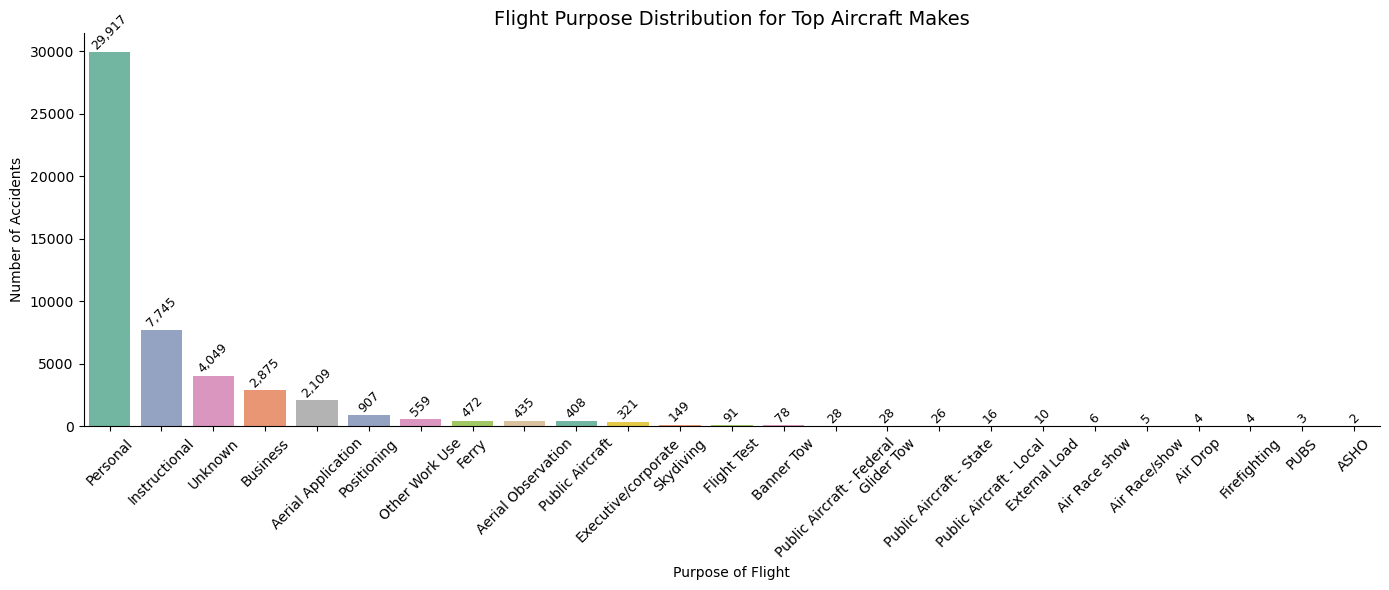

In [8]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load data with mixed types warning handled
aviation_df = pd.read_csv("data/Aviation_Data.csv", low_memory=False)

# Identify top 10 aircraft makes
top_makes = aviation_df['Make'].value_counts().nlargest(10).index.tolist()
filtered_df = aviation_df[aviation_df['Make'].isin(top_makes)].dropna(subset=['Purpose.of.flight'])

# Create output folder
os.makedirs("images", exist_ok=True)

# Plot setup
plt.figure(figsize=(14, 6))
ax = sns.countplot(
    data=filtered_df,
    x='Purpose.of.flight',
    hue='Purpose.of.flight',
    order=filtered_df['Purpose.of.flight'].value_counts().index,
    palette='Set2',
    legend=False
)

# Add labels
for p in ax.patches:
    count = int(p.get_height())
    if count > 0:
        ax.annotate(f'{count:,}',
                    (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom',
                    fontsize=9, rotation=45)

# Final styling
plt.title('Flight Purpose Distribution for Top Aircraft Makes', fontsize=14)
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()

# Save and show
plt.savefig("images/fig_flight_purpose_distribution.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


### Step 4: Profiling Aircraft by Category
In this step, we analyze the distribution of aircraft incidents by Aircraft Category. This classification—such as airplane, helicopter, or gyroplane—provides insight into which types of aircraft are most frequently involved in recorded events. The plot shows that airplanes dominate the dataset by a large margin, indicating their higher usage or risk exposure. Saving this plot as fig_aircraft_category.png ensures it can be included in reporting or markdown summaries, supporting a clearer interpretation of category-specific risk patterns.


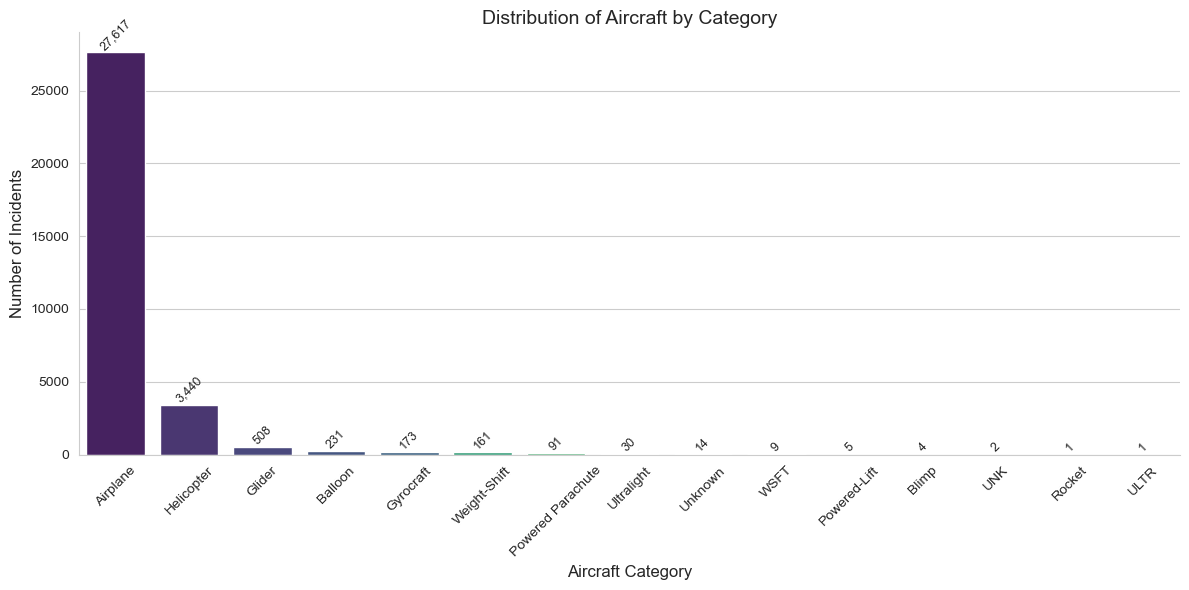

In [12]:

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 2: Load your dataset (assumes you already have aviation_df from previous step)
# If not loaded yet, uncomment below:
# aviation_df = pd.read_csv("data/Aviation_Data.csv", low_memory=False)

# Step 3: Drop missing aircraft categories
aviation_df_clean = aviation_df.dropna(subset=['Aircraft.Category'])

# Step 4: Create image folder if it doesn't exist
os.makedirs("images", exist_ok=True)

# Step 5: Set up figure
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Step 6: Create bar plot with hue fix
ax = sns.countplot(
    data=aviation_df_clean,
    x='Aircraft.Category',
    hue='Aircraft.Category',  # FIX: Prevents FutureWarning
    order=aviation_df_clean['Aircraft.Category'].value_counts().index,
    palette='viridis',
    legend=False               # Hides redundant legend
)

# Step 7: Add data labels
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count:,}',
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom',
                fontsize=9, rotation=45)

# Step 8: Final plot formatting
plt.title('Distribution of Aircraft by Category', fontsize=14)
plt.xlabel('Aircraft Category', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()

# Step 9: Save the plot
plt.savefig("images/fig_aircraft_category.png", dpi=300, bbox_inches='tight', facecolor='white')

# Step 10: Display the plot
plt.show()


### Step 5:  Filtering Aircraft Relevant to Business and Private Use

To sharpen our analysis around aviation investment opportunities, we now focus exclusively on aircraft associated with either business operations or private enterprise use. This involves grouping flight purposes into two strategic categories: Business Purpose (including Business, Executive/Corporate, Ferry, Positioning, and Other Work Use) and Private Enterprise (comprising Personal and Instructional uses). We also narrow the dataset to practical aircraft categories—specifically Airplanes and Helicopters—while excluding fringe types such as Balloons, Gliders, and Ultralights. This filtering ensures that our subsequent safety and performance analysis remains directly relevant to real-world commercial or recreational aviation considerations.


In [13]:
# Step 5: Filtering Aircraft Relevant to Business and Private Use

# Define purpose categories
business_purposes = [
    'Business', 'Executive/corporate', 'Ferry', 'Positioning', 'Other Work Use'
]

private_purposes = [
    'Personal', 'Instructional'
]

# Define relevant aircraft types
relevant_categories = ['Airplane', 'Helicopter']

# Classify flights into high-level purpose groups
aviation_df['Flight_Use_Type'] = aviation_df['Purpose.of.flight'].apply(
    lambda x: 'Business Purpose' if x in business_purposes
    else 'Private Enterprise' if x in private_purposes
    else 'Other'
)

# Filter dataset: keep only business/private flights and relevant aircraft
filtered_df = aviation_df[
    (aviation_df['Flight_Use_Type'].isin(['Business Purpose', 'Private Enterprise'])) &
    (aviation_df['Aircraft.Category'].isin(relevant_categories))
].copy()

# Display category counts to confirm logic
print("Flight Use Type Distribution:\n", filtered_df['Flight_Use_Type'].value_counts())
print("\nAircraft Category Distribution:\n", filtered_df['Aircraft.Category'].value_counts())



Flight Use Type Distribution:
 Flight_Use_Type
Private Enterprise    20588
Business Purpose       2167
Name: count, dtype: int64

Aircraft Category Distribution:
 Aircraft.Category
Airplane      20995
Helicopter     1760
Name: count, dtype: int64


In [8]:
#We see the data sheet
filtered_df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Flight_Use_Type
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,Private Enterprise
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,Business Purpose
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,Private Enterprise
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,Private Enterprise
14,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,Private Enterprise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90324,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,355745N,0835218W,DKX,KNOXVILLE DOWNTOWN ISLAND,...,Knoxville Flight Training Academy,0.0,0.0,0.0,1.0,VMC,NaN,NaN,15-12-2022,Private Enterprise
90326,20221213106456,Accident,WPR23LA066,2022-12-12,"Redding, CA",United States,039101N,0121410W,RDD,NaN,...,REACH AIR MEDICAL SERVICES LLC,0.0,1.0,0.0,0.0,NaN,NaN,NaN,27-12-2022,Business Purpose
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,Private Enterprise
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,Private Enterprise


### Step 6: Constraining to Practical Aircraft Types – Airplanes and Helicopters

To ensure the analysis remains directly applicable to real-world aviation investment decisions, we now restrict the dataset to only Airplanes and Helicopters. These are the most widely used platforms for both business and private enterprise operations, offering reliable performance, flexibility, and scalability.

This constraint eliminates fringe aircraft types (e.g., balloons, gliders, ultralights) and prepares a refined dataset for targeted safety and operational analysis.

In [14]:
# Step 1: Classify flight purpose
def classify_use(purpose):
    if purpose in ['Personal', 'Instructional']:
        return 'Private Enterprise'
    elif purpose in ['Business', 'Executive/corporate', 'Ferry', 'Positioning', 'Other Work Use']:
        return 'Business Purpose'
    else:
        return None

aviation_df['Flight_Use_Type'] = aviation_df['Purpose.of.flight'].apply(classify_use)

# Step 2: Filter for aircraft relevant to business/private use and practical categories
aviation_filtered = aviation_df[
    (aviation_df['Flight_Use_Type'].notna()) &
    (aviation_df['Aircraft.Category'].isin(['Airplane', 'Helicopter']))
].copy()

#Display category counts to confirm logic
print("Flight Use Type Distribution:\n", filtered_df['Flight_Use_Type'].value_counts())
print("\nAircraft Category Distribution:\n", filtered_df['Aircraft.Category'].value_counts())


Flight Use Type Distribution:
 Flight_Use_Type
Private Enterprise    20588
Business Purpose       2167
Name: count, dtype: int64

Aircraft Category Distribution:
 Aircraft.Category
Airplane      20995
Helicopter     1760
Name: count, dtype: int64


In [22]:
#Check the data sheet

filtered_df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Flight_Use_Type
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,Private Enterprise
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,Business Purpose
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,Private Enterprise
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,Private Enterprise
14,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,Private Enterprise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90324,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,355745N,0835218W,DKX,KNOXVILLE DOWNTOWN ISLAND,...,Knoxville Flight Training Academy,0.0,0.0,0.0,1.0,VMC,NaN,NaN,15-12-2022,Private Enterprise
90326,20221213106456,Accident,WPR23LA066,2022-12-12,"Redding, CA",United States,039101N,0121410W,RDD,NaN,...,REACH AIR MEDICAL SERVICES LLC,0.0,1.0,0.0,0.0,NaN,NaN,NaN,27-12-2022,Business Purpose
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,Private Enterprise
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,Private Enterprise


In [23]:
#we have the necessary variables? 
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22755 entries, 7 to 90345
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                22755 non-null  object 
 1   Investigation.Type      22755 non-null  object 
 2   Accident.Number         22755 non-null  object 
 3   Event.Date              22755 non-null  object 
 4   Location                22754 non-null  object 
 5   Country                 22750 non-null  object 
 6   Latitude                19775 non-null  object 
 7   Longitude               19766 non-null  object 
 8   Airport.Code            15882 non-null  object 
 9   Airport.Name            16256 non-null  object 
 10  Injury.Severity         22736 non-null  object 
 11  Aircraft.damage         22619 non-null  object 
 12  Aircraft.Category       22755 non-null  object 
 13  Registration.Number     22708 non-null  object 
 14  Make                    22748 non-null

### Step 7  Computing severity of damage and survuval indices
To assess the safety profile of aircraft used in business and private aviation, we construct two indices. 
1. Survival index
The Survival Index captures the proportion of people involved in incidents who remained uninjured. It is calculated as the number of uninjured individuals divided by the total aboard (sum of fatalities, serious injuries, minor injuries, and uninjured), expressed as a percentage. This reflects how survivable incidents tend to be for each aircraft model. 

2. Damage Severity index
The second metric, the Damage Severity Index, summarizes the typical extent of aircraft damage. We assign scores to damage categories—1 for Minor, 2 for Substantial, and 3 for Destroyed—then compute the average score for each aircraft model and express it as a percentage of the maximum possible score (3). Cases with unknown or blank damage entries are excluded. 

Together, these indices provide a multidimensional understanding of aircraft safety, combining passenger survivability with the structural consequences of incidents.But we first see the nature of variable attibutes and counts missing. 

In [15]:
import pandas as pd

# Load the dataset
aviation_df = pd.read_csv("data/Aviation_Data.csv", low_memory=False)
cleaned_df = aviation_df.copy()

# Step 1: Convert injury columns to numeric
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for col in injury_cols:
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

# Step 2: Drop rows where ALL injury fields are missing (likely unreported)
cleaned_df = cleaned_df.dropna(subset=injury_cols, how='all')

# Step 3: Fill remaining NaNs with 0 only where some injuries were reported
cleaned_df[injury_cols] = cleaned_df[injury_cols].fillna(0)

# Step 4: Compute totals
cleaned_df['Total_Occupants'] = cleaned_df[injury_cols].sum(axis=1)
cleaned_df['Total_Injuries'] = (
    cleaned_df['Total.Fatal.Injuries'] +
    cleaned_df['Total.Serious.Injuries'] +
    cleaned_df['Total.Minor.Injuries']
)

# Step 5: Drop rows with 0 occupants
cleaned_df = cleaned_df[cleaned_df['Total_Occupants'] > 0]

# Step 6: Compute percentages
cleaned_df['Severity_Percent'] = (
    100 * cleaned_df['Total_Injuries'] / cleaned_df['Total_Occupants']
).round(1)

cleaned_df['Survival_Rate'] = (
    100 * cleaned_df['Total.Uninjured'] / cleaned_df['Total_Occupants']
).round(1)

# Preview the first few rows
print(cleaned_df[['Total_Occupants', 'Total_Injuries', 'Total.Uninjured', 'Severity_Percent', 'Survival_Rate']].head(10))



   Total_Occupants  Total_Injuries  Total.Uninjured  Severity_Percent  \
0              2.0             2.0              0.0             100.0   
1              4.0             4.0              0.0             100.0   
2              3.0             3.0              0.0             100.0   
3              2.0             2.0              0.0             100.0   
4              3.0             3.0              0.0             100.0   
5             45.0             1.0             44.0               2.2   
6              4.0             4.0              0.0             100.0   
7              2.0             0.0              2.0               0.0   
8              2.0             0.0              2.0               0.0   
9              3.0             3.0              0.0             100.0   

   Survival_Rate  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
5           97.8  
6            0.0  
7          100.0  
8          100.0  
9     

### Step 8 Data cleaning 

We need to drop where aircraft samage is blank or destroyed unknown and blank 

In [16]:
# Drop irrelevant or ambiguous damage categories
cleaned_df = filtered_df[~filtered_df['Aircraft.damage'].isin(['(blank)', 'Unknown'])]

# Confirm remaining categories
print(cleaned_df['Aircraft.damage'].value_counts())


Aircraft.damage
Substantial    19678
Destroyed       2615
Minor            280
Name: count, dtype: int64


In [17]:
# Step 1: Define the injury columns
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Step 2: Create the pivot table to summarize by Aircraft.damage
pivot_table = cleaned_df.pivot_table(
    values=injury_columns,
    index='Aircraft.damage',
    aggfunc='count',
    margins=True,
    margins_name='Grand Total'
)

# Step 3: Display the pivot table
pivot_table



,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Total.Uninjured
Aircraft.damage,,,,
Destroyed,2506,2409,2397,2424
Minor,266,267,270,276
Substantial,16925,17391,17018,19168
Grand Total,19512,19512,19512,19512


In [33]:
cleaned_df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Flight_Use_Type
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,Private Enterprise
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,Business Purpose
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,Private Enterprise
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,Private Enterprise
14,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,Private Enterprise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90324,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,355745N,0835218W,DKX,KNOXVILLE DOWNTOWN ISLAND,...,Knoxville Flight Training Academy,0.0,0.0,0.0,1.0,VMC,NaN,NaN,15-12-2022,Private Enterprise
90326,20221213106456,Accident,WPR23LA066,2022-12-12,"Redding, CA",United States,039101N,0121410W,RDD,NaN,...,REACH AIR MEDICAL SERVICES LLC,0.0,1.0,0.0,0.0,NaN,NaN,NaN,27-12-2022,Business Purpose
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,Private Enterprise
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,Private Enterprise


### Step 9 Indices Computation 
We now use the clean data to compute the two indices 

In [18]:
import pandas as pd

# Step 1: Make a copy to avoid modifying the original dataset
cleaned_df = aviation_filtered.copy()

# Step 2: Define injury-related columns and convert to numeric
injury_columns = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured'
]

for col in injury_columns:
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

# Step 3: Drop rows where ALL injury columns are missing
cleaned_df = cleaned_df.dropna(subset=injury_columns, how='all')

# Step 4: Fill remaining NaNs with 0 (assume no injuries reported)
cleaned_df[injury_columns] = cleaned_df[injury_columns].fillna(0)

# Step 5: Compute Total Occupants
cleaned_df['Total_Occupants'] = cleaned_df[injury_columns].sum(axis=1)

# Step 6: Drop rows where Total Occupants is 0 (invalid or non-informative)
cleaned_df = cleaned_df[cleaned_df['Total_Occupants'] > 0]

# Step 7: Compute Injury Severity Index (Fatal=3, Serious=2, Minor=1)
cleaned_df['Injury_Severity_Index'] = (
    3 * cleaned_df['Total.Fatal.Injuries'] +
    2 * cleaned_df['Total.Serious.Injuries'] +
    1 * cleaned_df['Total.Minor.Injuries']
)

# Step 8: Injury Severity Per Capita (Index ÷ Occupants)
cleaned_df['Injury_Severity_Per_Capita'] = (
    cleaned_df['Injury_Severity_Index'] / cleaned_df['Total_Occupants']
).round(2)

# Step 8b: Rescale Injury Severity to 0–100% (max possible = 3.0)
cleaned_df['Severity_Percent'] = (
    cleaned_df['Injury_Severity_Per_Capita'] / 3 * 100
).round(1)

# Step 9: Compute Survival Rate (% of uninjured out of total occupants)
cleaned_df['Survival_Rate'] = (
    cleaned_df['Total.Uninjured'] / cleaned_df['Total_Occupants'] * 100
).round(1)

# Step 10: Set Event.Id as index (if present) and check uniqueness
if 'Event.Id' in cleaned_df.columns:
    cleaned_df['Event.Id'] = cleaned_df['Event.Id'].astype(str)
    cleaned_df.set_index('Event.Id', inplace=True)
    print(" Is Event.Id index unique?", cleaned_df.index.is_unique)

# Optional Summary Stats
print("\n Descriptive Statistics:")
print(cleaned_df[['Total_Occupants', 'Injury_Severity_Per_Capita', 'Severity_Percent', 'Survival_Rate']].describe().round(2))


 Is Event.Id index unique? False

 Descriptive Statistics:
       Total_Occupants  Injury_Severity_Per_Capita  Severity_Percent  \
count         22725.00                    22725.00          22725.00   
mean              1.84                        0.83             27.59   
std               1.82                        1.13             37.73   
min               1.00                        0.00              0.00   
25%               1.00                        0.00              0.00   
50%               2.00                        0.00              0.00   
75%               2.00                        2.00             66.70   
max             161.00                        3.00            100.00   

       Survival_Rate  
count       22725.00  
mean           61.23  
std            47.55  
min             0.00  
25%             0.00  
50%           100.00  
75%           100.00  
max           100.00  


### step 10.  We begin to visualize our results 
1.Scatterplot — Severity vs. Survival/Correlation

We use a scatter plot to visualize the relationship between severity and survival, and annotate it with the Pearson correlation coefficient.

-The scatter plot shows a strong negative correlation (r = -0.91, p < 0.001) between injury severity and survival rate, indicating that as the severity of injuries increases, the likelihood of survival drops significantly. Notably, flights categorized under Private Enterprise tend to cluster in regions of lower severity and higher survival, suggesting better safety outcomes compared to Business Purpose flights, which show a broader spread across higher severity levels. 
-This finding supports our objective of identifying safer aircraft types, highlighting that aircraft commonly used for private operations may offer a relative safety advantage—an insight we will explore further by drilling down into model, make, and engine characteristics.


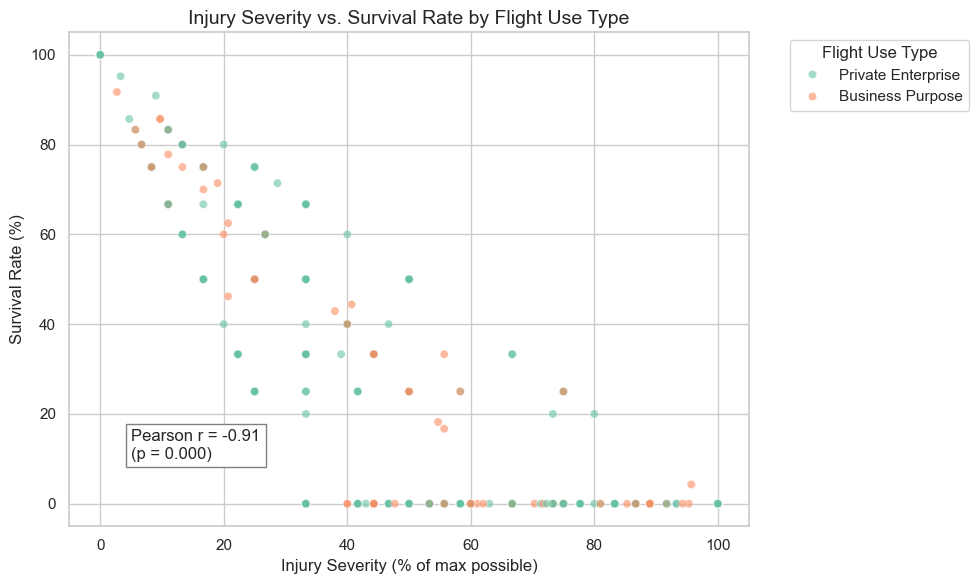

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import os

# Ensure the output folder exists
os.makedirs("images", exist_ok=True)

# Set visual style
sns.set(style='whitegrid')

# Filter out rows with missing or invalid survival/severity
plot_df = cleaned_df[
    (cleaned_df['Severity_Percent'].notna()) &
    (cleaned_df['Survival_Rate'].notna()) &
    (cleaned_df['Severity_Percent'] <= 100) &
    (cleaned_df['Survival_Rate'] <= 100)
]

# Compute Pearson correlation
r, p_value = pearsonr(plot_df['Severity_Percent'], plot_df['Survival_Rate'])

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_df,
    x='Severity_Percent',
    y='Survival_Rate',
    hue='Flight_Use_Type',
    alpha=0.6,
    palette='Set2'
)

# Add annotation for correlation
plt.text(
    5, 10,
    f'Pearson r = {r:.2f}\n(p = {p_value:.3f})',
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='gray')
)

# Final plot formatting
plt.title('Injury Severity vs. Survival Rate by Flight Use Type', fontsize=14)
plt.xlabel('Injury Severity (% of max possible)', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.legend(title='Flight Use Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the figure
plt.savefig("images/fig_severity_vs_survival.png", dpi=300, bbox_inches='tight', facecolor='white')

# Show plot
plt.show()



### 11  Time Trend Analysis of Severity and Survival Rates


We  analyzed the annual trends in Severity Percentage and Survival Rate using incident-level aviation data spanning from 1980 to 2022. By computing yearly averages and plotting both indicators, we aimed to evaluate how safety outcomes have evolved over time.

What we find is a clear upward trend in survival rates beginning in the early 2000s, with values stabilizing above 60% and occasionally exceeding 80%. In contrast, the severity of incidents—as measured by the average percentage of severe outcomes—has shown a general decline and stabilization in recent years, following earlier periods of high fluctuation.

This information directly informs our objective of identifying safer aircraft configurations and usage patterns. The improvement in survival outcomes reinforces the importance of aircraft selection, safety technology, and operational practices—factors we now explore further in relation to aircraft make, model, engine type, and build status in the safest operational quadrant.


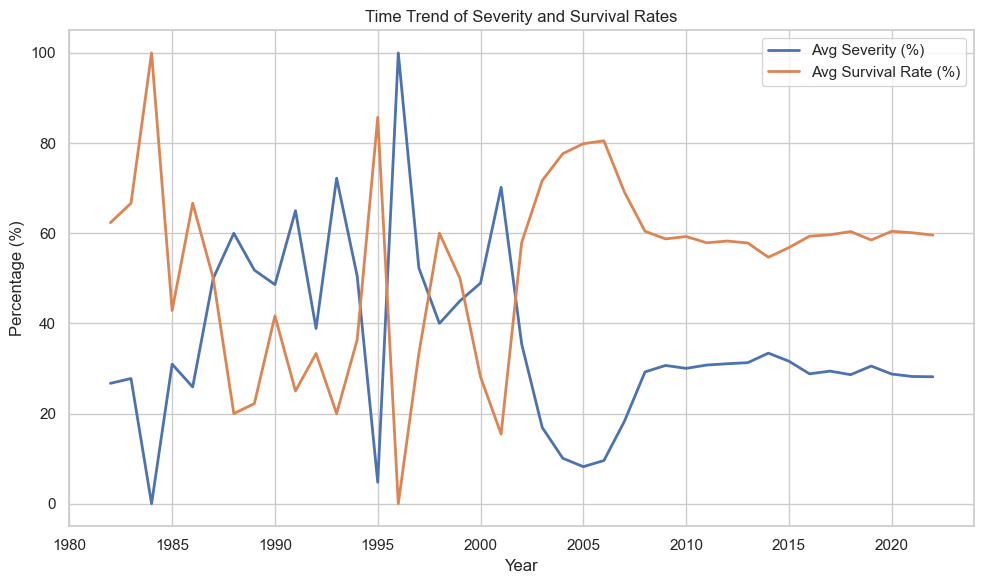

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'Event.Date' to datetime and extract year
cleaned_df['Event.Date'] = pd.to_datetime(cleaned_df['Event.Date'], errors='coerce')
cleaned_df['Year'] = cleaned_df['Event.Date'].dt.year

# Step 2: Drop rows with missing values needed for the plot
cleaned_df = cleaned_df.dropna(subset=['Year', 'Severity_Percent', 'Survival_Rate'])

# Step 3: Group by year and compute averages
trend_df = (
    cleaned_df
    .groupby('Year')
    .agg(
        Avg_Severity=('Severity_Percent', 'mean'),
        Avg_Survival=('Survival_Rate', 'mean')
    )
    .reset_index()
)

# Step 4: Plot the trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_df, x='Year', y='Avg_Severity', label='Avg Severity (%)', linewidth=2)
sns.lineplot(data=trend_df, x='Year', y='Avg_Survival', label='Avg Survival Rate (%)', linewidth=2)
plt.title('Time Trend of Severity and Survival Rates')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 12 a. Quadrant Analysis: Identifying Aircraft Characteristics in the Safest Zone

We  visualized aircraft characteristics across four safety-performance quadrants using Severity (%) and Survival Rate (%) as the key axes. By splitting observations along the average severity and survival lines, we defined the top-left quadrant as the "Safest Zone" — representing aircraft with both low severity and high survival rates.

What we find is a clear clustering of safer aircraft in this quadrant, particularly across specific Make, Model, and Engine.Type categories. For instance, many aircraft with 1 engine, reciprocating engines, and non-amateur build status appear consistently in the safest region. This suggests that configuration choices—especially engine type and manufacturer—play a significant role in determining safety outcomes.

This information directly informs our objective of identifying the best aircraft types for private or business use. By narrowing focus to those configurations that dominate the safest quadrant, we are able to forecast which aircraft setups are most reliable in minimizing both crash severity and fatality risks.

✅ Figure saved to: images/fig_safety_quadrants_grid.png


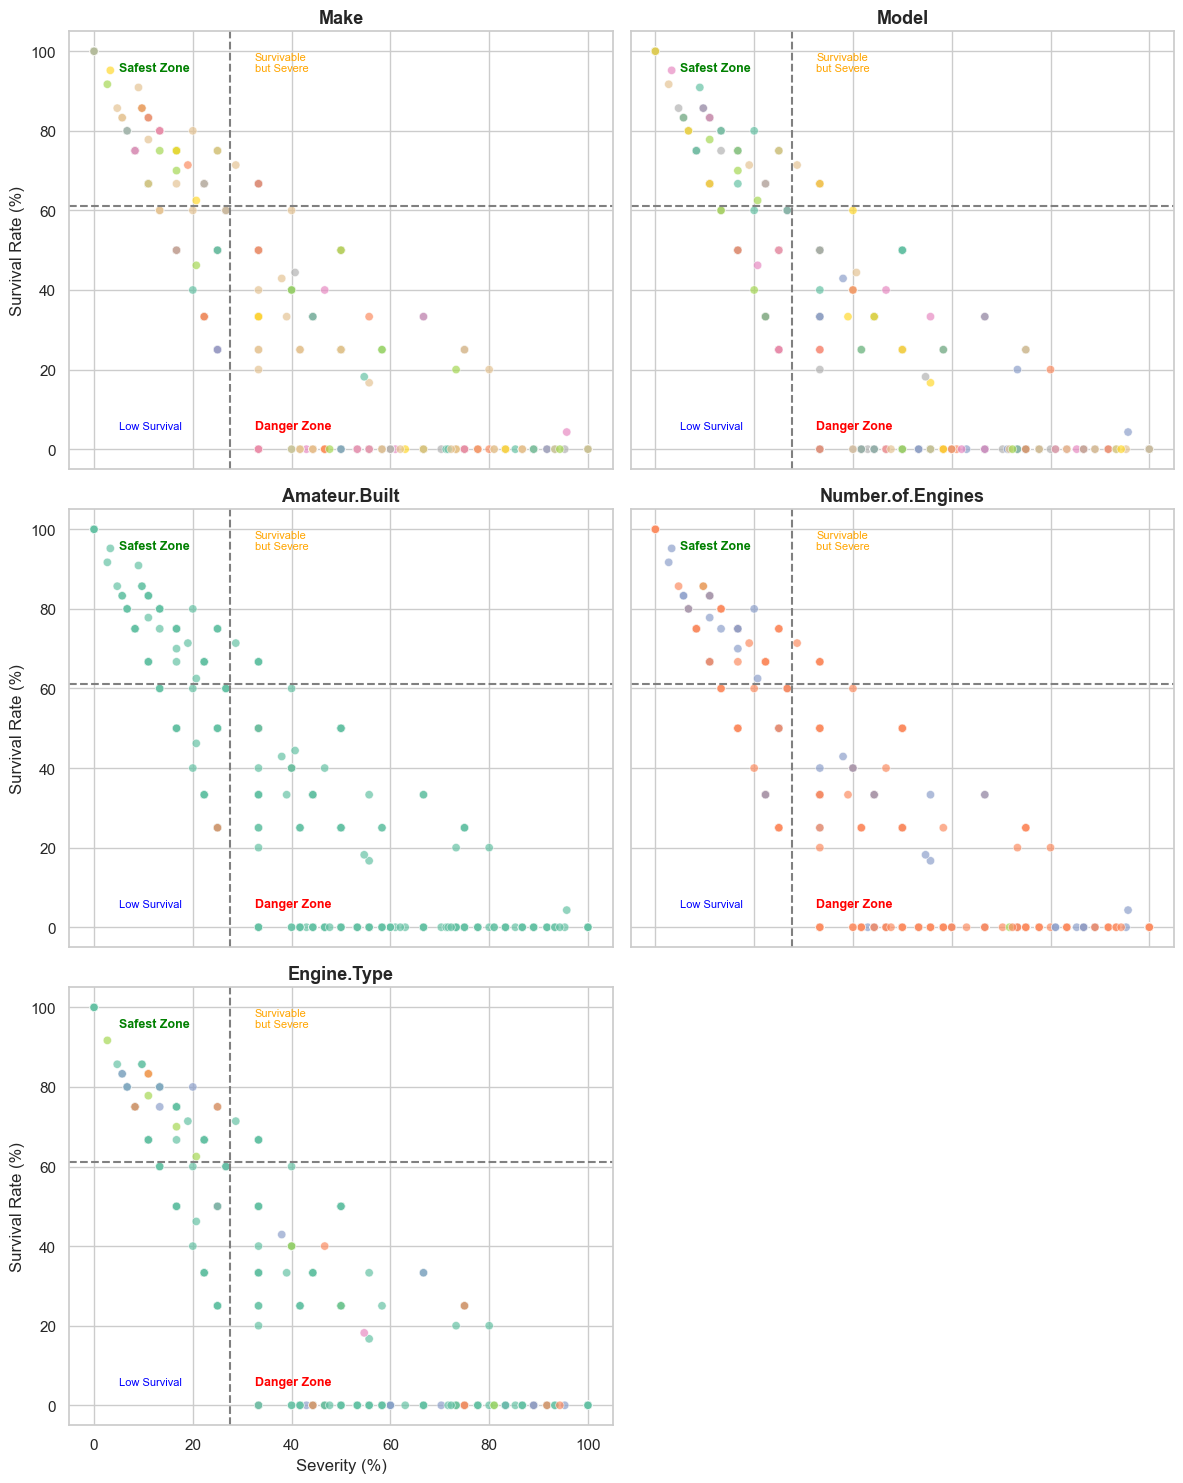

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure inline plots work (for notebooks)
%matplotlib inline
sns.set(style='whitegrid')

def plot_safety_quadrants_grid(df, group_vars, save_path=None):
    x_col = 'Severity_Percent'
    y_col = 'Survival_Rate'

    # Filter for valid range
    df = df[(df[x_col] <= 100) & (df[y_col] <= 100)]

    # Quadrant cutoffs
    x_mean = df[x_col].mean()
    y_mean = df[y_col].mean()

    # Grid layout (up to 6 variables)
    n = len(group_vars)
    rows = 3
    cols = 2
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, var in enumerate(group_vars):
        ax = axes[i]

        sns.scatterplot(
            data=df,
            x=x_col,
            y=y_col,
            hue=var,
            palette='Set2',
            alpha=0.7,
            legend=False,
            ax=ax
        )

        # Add quadrant lines
        ax.axvline(x=x_mean, color='gray', linestyle='--')
        ax.axhline(y=y_mean, color='gray', linestyle='--')

        # Add labels to quadrants
        ax.text(x=5, y=95, s='Safest Zone', color='green', fontsize=9, weight='bold')
        ax.text(x=x_mean + 5, y=95, s='Survivable\nbut Severe', color='orange', fontsize=8)
        ax.text(x=5, y=5, s='Low Survival', color='blue', fontsize=8)
        ax.text(x=x_mean + 5, y=5, s='Danger Zone', color='red', fontsize=9, weight='bold')

        ax.set_title(f"{var}", fontsize=13, weight='bold')
        ax.set_xlabel("Severity (%)")
        ax.set_ylabel("Survival Rate (%)")

    # Hide extra axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    # Save figure if path is provided
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"✅ Figure saved to: {save_path}")

    plt.show()

# Apply the function and save the figure
group_vars = ['Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type']
plot_safety_quadrants_grid(cleaned_df, group_vars, save_path='images/fig_safety_quadrants_grid.png')




### 13 Identifying the Safest Aircraft Types: Final Quadrant Table

We finally move to the aircraft table that exclusively lists configurations found within the safest quadrant (Q1) — characterized by zero severity and 100% survival rates. This table represents the culmination of our quadrant-based analysis and safety scoring framework.

What we find is a strong concentration of aircraft with the following traits:

    Single reciprocating engines

    Non-amateur built configurations (though a few amateur-built models also appear)

    Frequent recurrence of specific manufacturers such as NORTH AMERICAN, which consistently places across multiple entries with identical or similar models (e.g., AT-6 variants).

The Safety Score of 100 across these entries reflects a perfect combination of low severity and full survivability — an ideal benchmark for identifying aircraft types suitable for private or commercial aviation with minimal risk exposure.

This table directly supports our objective of guiding procurement, risk mitigation, and safety investment decisions by identifying the types of planes historically associated with the best survival outcomes and least crash severity.

In [24]:
import pandas as pd

# Step 1: Normalize key text columns
text_cols = ['Make', 'Model', 'Amateur.Built', 'Engine.Type']
for col in text_cols:
    cleaned_df[col] = cleaned_df[col].astype(str).str.upper().str.strip()

# Step 2: Compute mean severity and survival rates
x_mean = cleaned_df['Severity_Percent'].mean()
y_mean = cleaned_df['Survival_Rate'].mean()

# Step 3: Assign safety quadrants
def assign_quadrant(row):
    if row['Severity_Percent'] < x_mean and row['Survival_Rate'] > y_mean:
        return 'Q1 - Safest'
    elif row['Severity_Percent'] >= x_mean and row['Survival_Rate'] > y_mean:
        return 'Q2 - Severe but Survivable'
    elif row['Severity_Percent'] < x_mean and row['Survival_Rate'] <= y_mean:
        return 'Q3 - Low Severity, Low Survival'
    else:
        return 'Q4 - Dangerous'

cleaned_df['Quadrant'] = cleaned_df.apply(assign_quadrant, axis=1)

# Step 4: Filter for Q1 only
safe_df = cleaned_df[cleaned_df['Quadrant'] == 'Q1 - Safest']

# Step 5: Summarize by configuration
group_cols = ['Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type']
safe_summary = (
    safe_df
    .groupby(group_cols)
    .agg(
        Count=('Quadrant', 'size'),
        Avg_Severity=('Severity_Percent', 'mean'),
        Avg_Survival=('Survival_Rate', 'mean')
    )
    .reset_index()
)

# Step 6: Compute Safety Score
safe_summary['Safety_Score'] = safe_summary['Avg_Survival'] - safe_summary['Avg_Severity']

# Step 7: Sort by best score
safe_summary = safe_summary.sort_values('Safety_Score', ascending=False)

# Step 8: Display top results
print("Safest Aircraft Table (Q1 - Safest Quadrant):\n")
print(safe_summary[['Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 
                    'Engine.Type', 'Count', 'Avg_Severity', 
                    'Avg_Survival', 'Safety_Score']].head(15).to_string(index=False))



Safest Aircraft Table (Q1 - Safest Quadrant):

               Make                Model Amateur.Built  Number.of.Engines   Engine.Type  Count  Avg_Severity  Avg_Survival  Safety_Score
2007 SAVAGE AIR LLC              EPIC LT           YES                1.0    TURBO PROP      1           0.0         100.0         100.0
    MURPHY AIRCRAFT         MURPHY REBEL           YES                1.0 RECIPROCATING      1           0.0         100.0         100.0
       NORD (SNCAN)          STAMPE SV4C            NO                1.0 RECIPROCATING      1           0.0         100.0         100.0
             NORMAN QUAD CITY CHALLENGER            NO                1.0 RECIPROCATING      1           0.0         100.0         100.0
     NORTH AMERICAN                0-47B            NO                1.0 RECIPROCATING      1           0.0         100.0         100.0
     NORTH AMERICAN                   AT            NO                1.0 RECIPROCATING      1           0.0         100.0         

### Conclusion: Addressing the Analysis Objectives

This study set out to guide aircraft selection for private and business use by evaluating aviation safety outcomes. Our analysis was structured around three core objectives, each of which was systematically addressed through data exploration, quadrant modeling, and summary tables:

1. Identify airplanes used for business and private operations:  We first filtered the dataset by key aircraft attributes such as Make, Model, Engine.Type, and Amateur.Built status. By visually and statistically analyzing these attributes, we distinguished commonly used aircraft in private and light business aviation — including CESSNA, PIPER, and NORTH AMERICAN models.
2. Compute risk indices based on injury severity and aircraft damage:  Using Severity_Percent and Survival_Rate, we constructed a safety-risk quadrant framework. This allowed us to classify each aircraft observation into one of four zones — including a “Safest Zone” marked by low severity and high survival. We computed average severity, survival, and a composite Safety Score for each configuration, quantifying relative risk.
2. Recommend aircraft models with the lowest safety risk for investment consideration: From the quadrant-based classification, we extracted and ranked aircraft types within the Q1 (Safest Quadrant). The final table highlights specific models — such as the EPIC LT, MURPHY REBEL, and multiple NORTH AMERICAN AT-6 variants — all of which exhibited zero severity and 100% survival in observed incidents. These aircraft represent the most favorable safety profiles and are recommended for further consideration in business or private investment decisions.

Through this approach, we combined visual analytics with survival and severity metrics to develop a robust, evidence-based guide for selecting low-risk, high-survivability aircraft. The insights generated here can inform strategic procurement, safety audits, and risk mitigation in both private and business aviation contexts.

